In [7]:
import sys

sys.path.insert(1, 'C:/Users/peter/Desktop/volatility-forecasting/midas')

from volatility import GARCH
from weights import Beta
from base import BaseModel
from helper_functions import create_matrix
import pandas as pd
import numpy as np
import time
import statsmodels.api as sm

In [29]:
def create_sim(sim_num = 500, sim_length = 500):
    lls, alpha0, alpha1, beta1, runtime = np.zeros(sim_num), np.zeros(sim_num), np.zeros(sim_num), np.zeros(sim_num), np.zeros(sim_num)
    model = GARCH(plot = False)
    
    for i in range(sim_num):
        np.random.seed(i)
        y, _ = model.simulate(num = sim_length)
        start = time.time()
        model.fit(['', '01', '01', '01'], y)
        runtime[i] = time.time() - start
#        print("{}st iteration's runTime: {} sec.\n".format(i+1, round(runtime[i], 4)))
        lls[i], alpha0[i], alpha1[i], beta1[i] = model.opt.fun, model.optimized_params[1], model.optimized_params[2], model.optimized_params[3]
        
    return lls, alpha0, alpha1, beta1, runtime

In [30]:
sim500 = pd.DataFrame(create_sim(sim_length = 500))

In [31]:
sim1000 = pd.DataFrame(create_sim(sim_length = 1000))

In [45]:
sim2000 = pd.DataFrame(create_sim(sim_length = 2000))

C:/Users/peter/Desktop/volatility-forecasting/midas\stats.py:35: RuntimeWarning: invalid value encountered in log
  lls = -0.5 * (np.log(2*np.pi) + np.log(sigma2) + resid ** 2 / sigma2)
C:/Users/peter/Desktop/volatility-forecasting/midas\base.py:36: RuntimeWarning: overflow encountered in exp
  params[i] = 1 / (1 + np.exp(-params_trans[i]))
C:/Users/peter/Desktop/volatility-forecasting/midas\volatility.py:116: RuntimeWarning: divide by zero encountered in double_scalars
  sigma2[i] = params[1] / (1 - params[2] - params[3])
C:/Users/peter/Desktop/volatility-forecasting/midas\volatility.py:118: RuntimeWarning: invalid value encountered in double_scalars
  sigma2[i] = params[1] + params[2] * resid[i - 1] ** 2 + params[3] * sigma2[i - 1]
C:/Users/peter/Desktop/volatility-forecasting/midas\volatility.py:116: RuntimeWarning: invalid value encountered in double_scalars
  sigma2[i] = params[1] / (1 - params[2] - params[3])
C:/Users/peter/Desktop/volatility-forecasting/midas\stats.py:35: Runtim

In [52]:
sim5000 = pd.DataFrame(create_sim(sim_length = 5000))

C:/Users/peter/Desktop/volatility-forecasting/midas\stats.py:35: RuntimeWarning: invalid value encountered in log
  lls = -0.5 * (np.log(2*np.pi) + np.log(sigma2) + resid ** 2 / sigma2)
C:/Users/peter/Desktop/volatility-forecasting/midas\base.py:36: RuntimeWarning: overflow encountered in exp
  params[i] = 1 / (1 + np.exp(-params_trans[i]))
C:/Users/peter/Desktop/volatility-forecasting/midas\volatility.py:116: RuntimeWarning: divide by zero encountered in double_scalars
  sigma2[i] = params[1] / (1 - params[2] - params[3])
C:/Users/peter/Desktop/volatility-forecasting/midas\volatility.py:118: RuntimeWarning: invalid value encountered in double_scalars
  sigma2[i] = params[1] + params[2] * resid[i - 1] ** 2 + params[3] * sigma2[i - 1]
C:/Users/peter/Desktop/volatility-forecasting/midas\volatility.py:116: RuntimeWarning: invalid value encountered in double_scalars
  sigma2[i] = params[1] / (1 - params[2] - params[3])


In [32]:
sim500 = sim500.T

In [33]:
sim1000 = sim1000.T

In [46]:
sim2000 = sim2000.T 

In [53]:
sim5000 = sim5000.T

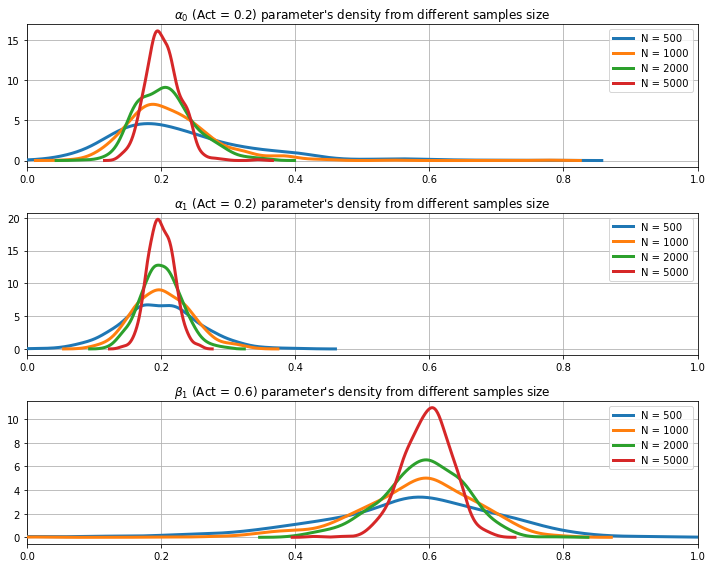

In [54]:
alpha0_500 = sm.nonparametric.KDEUnivariate(sim500.iloc[:, 1].values)
alpha0_500.fit()
alpha0_1000 = sm.nonparametric.KDEUnivariate(sim1000.iloc[:, 1].values)
alpha0_1000.fit()
alpha0_2000 = sm.nonparametric.KDEUnivariate(sim2000.iloc[:, 1].values)
alpha0_2000.fit()
alpha0_5000 = sm.nonparametric.KDEUnivariate(sim5000.iloc[:, 1].values)
alpha0_5000.fit()

alpha1_500 = sm.nonparametric.KDEUnivariate(sim500.iloc[:, 2].values)
alpha1_500.fit()
alpha1_1000 = sm.nonparametric.KDEUnivariate(sim1000.iloc[:, 2].values)
alpha1_1000.fit()
alpha1_2000 = sm.nonparametric.KDEUnivariate(sim2000.iloc[:, 2].values)
alpha1_2000.fit()
alpha1_5000 = sm.nonparametric.KDEUnivariate(sim5000.iloc[:, 2].values)
alpha1_5000.fit()


beta1_500 = sm.nonparametric.KDEUnivariate(sim500.iloc[:, 3].values)
beta1_500.fit()
beta1_1000 = sm.nonparametric.KDEUnivariate(sim1000.iloc[:, 3].values)
beta1_1000.fit()
beta1_2000 = sm.nonparametric.KDEUnivariate(sim2000.iloc[:, 3].values)
beta1_2000.fit()
beta1_5000 = sm.nonparametric.KDEUnivariate(sim5000.iloc[:, 3].values)
beta1_5000.fit()

fig , ax = plt.subplots(3, 1, figsize=(10, 8), tight_layout=True)

ax[0].plot(alpha0_500.support, alpha0_500.density, lw = 3, label = 'N = 500', zorder = 10)
ax[0].plot(alpha0_1000.support, alpha0_1000.density, lw = 3, label = 'N = 1000', zorder = 10)
ax[0].plot(alpha0_2000.support, alpha0_2000.density, lw = 3, label = 'N = 2000', zorder = 10)
ax[0].plot(alpha0_5000.support, alpha0_5000.density, lw = 3, label = 'N = 5000', zorder = 10)
ax[0].set_title(r'$\alpha_0$'+" (Act = 0.2) parameter's density from different samples size")
ax[0].grid(True, zorder = -5)
ax[0].set_xlim((0.0, 1.0))
ax[0].legend(loc = 'best')

ax[1].plot(alpha1_500.support, alpha1_500.density, lw = 3, label = 'N = 500', zorder = 10)
ax[1].plot(alpha1_1000.support, alpha1_1000.density, lw = 3, label = 'N = 1000', zorder = 10)
ax[1].plot(alpha1_2000.support, alpha1_2000.density, lw = 3, label = 'N = 2000', zorder = 10)
ax[1].plot(alpha1_5000.support, alpha1_5000.density, lw = 3, label = 'N = 5000', zorder = 10)
ax[1].set_title(r'$\alpha_1$'+" (Act = 0.2) parameter's density from different samples size")
ax[1].grid(True, zorder = -5)
ax[1].set_xlim((0.0, 1.0))
ax[1].legend(loc = 'best')

ax[2].plot(beta1_500.support, beta1_500.density, lw = 3, label = 'N = 500', zorder = 10)
ax[2].plot(beta1_1000.support, beta1_1000.density, lw = 3, label = 'N = 1000', zorder = 10)
ax[2].plot(beta1_2000.support, beta1_2000.density, lw = 3, label = 'N = 2000', zorder = 10)
ax[2].plot(beta1_5000.support, beta1_5000.density, lw = 3, label = 'N = 5000', zorder = 10)
ax[2].set_title(r'$\beta_1$'+" (Act = 0.6) parameter's density from different samples size")
ax[2].grid(True, zorder = -5)
ax[2].set_xlim((0.0, 1.0))
ax[2].legend(loc = 'best')


plt.savefig('C:/Users/peter/Desktop/volatility-forecasting/results/garch_sim.png')
plt.show()

In [48]:
sim500.to_csv('C:/Users/peter/Desktop/volatility-forecasting/results/garch_500.csv')
sim1000.to_csv('C:/Users/peter/Desktop/volatility-forecasting/results/garch_1000.csv')
sim2000.to_csv('C:/Users/peter/Desktop/volatility-forecasting/results/garch_2000.csv')

In [55]:
sim5000.to_csv('C:/Users/peter/Desktop/volatility-forecasting/results/garch_5000.csv')